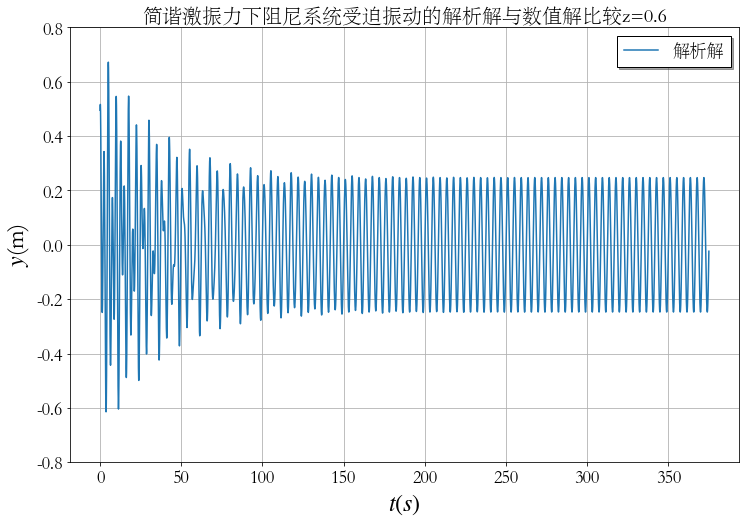

In [35]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
%matplotlib inline
sym.init_printing()

#z and ylim: [0.5,0.8],[0.6,0.8],[0.7,0.8],[0.8,1.0],[0.9,1.6],[0.95,3.0],[0.99,10],[1.05,3.0]
set = ([0.5,0.8],[0.6,0.8],[0.7,0.8],[0.8,1.0],[0.9,1.6],[0.95,3.0],[0.99,10],[1.05,3.0])
k=1

z = set[k][0]
ylim = set[k][1]
cycle = 150 

x0 = 0.5 
dx0 = 0.0 
fn = 0.4 
zeta = 0.00542 
q = 1.0

dt = 1/(fn*50) #timestep

x1,x2,x,t,f_n,zeta_ = sym.symbols('x_1 x_2 x t f_n zeta')
n,omega_n,omega_r = sym.symbols('n omega_n omega_r')   # intermediate variables
q_,omega_ = sym.symbols('q omega')      # forced vibration variables
x_0,dx_0 = sym.symbols('x_0 \dot{x_0}')  # initial condition 

A = sym.sqrt(x_0**2+((dx_0+n*x_0)/omega_r)**2)
phi_r = sym.atan(x_0*omega_r/(dx_0+n*x_0))
x1 = A*sym.exp(-n*t)*sym.sin(omega_r*t+phi_r)

B = q_/(sym.sqrt((omega_n**2-omega_**2)**2+4*n**2*omega_**2))
phi_ = sym.atan(2*n*omega_/(omega_n**2-omega_**2))
x2 = B*sym.sin(omega_*t-phi_)

x = x1 + x2
x = x.subs([(omega_r,sym.sqrt(omega_n**2-n**2)),(n,2*zeta_*omega_n),(omega_n,2*sym.pi*f_n)])
x = x.subs([(x_0,x0),(dx_0,dx0),(f_n,fn),(zeta_,zeta),(omega_,z*2*sym.pi*fn),(q_,q)])

f = sym.lambdify(t,x,'numpy')
t_s = np.arange(0,1/fn*cycle,dt)

plt.figure(figsize=(12,8))
plt.plot(t_s,f(t_s))
plt.title('简谐激振力下阻尼系统受迫振动的解析解与数值解比较z='+str(z),fontsize=20,loc = 'center')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([-ylim,ylim])
plt.grid(True)
plt.ylabel('$y$(m)',size=24,rotation=90)
plt.xlabel('$t(s)$',size=24)
plt.legend(['解析解'],fontsize='xx-large',loc='upper right',fancybox=False,shadow=True,edgecolor='black')
plt.savefig('UDFverification/z='+str(z)+'解析解.png',dpi=200)
data = np.stack([t_s,f(t_s)],axis=1)
np.savetxt('UDFverification/z='+str(z)+'解析解.dat',data,fmt='%f',delimiter=',')
#plt.annotate(s = 'Origin',xy=(0,0),xytext=(2,-0.2),arrowprops=
#             {'width':2,'headwidth':12,'headlength':24,'shrink':0.01})

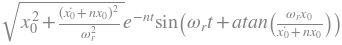

In [30]:
x

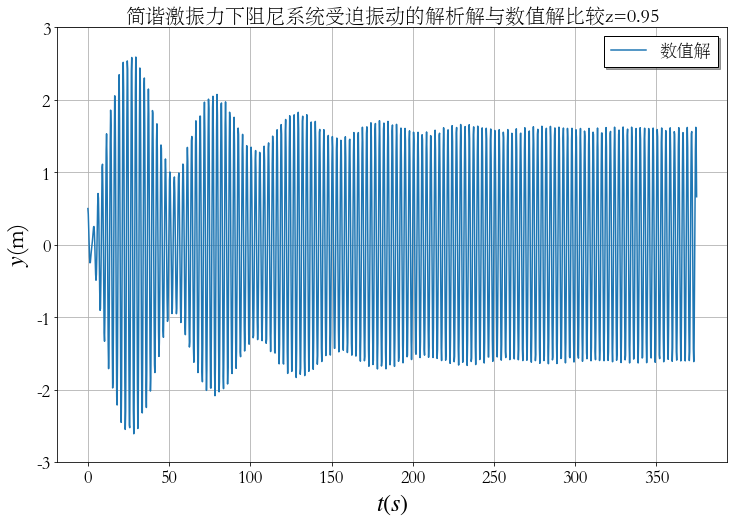

In [5]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
sym.init_printing()
%matplotlib inline

#z and ylim: [0.5,0.8],[0.6,0.8],[0.7,0.8],[0.8,1.0],[0.9,1.6],[0.95,3.0],[1.05,3.0]
set = ([0.5,0.8],[0.6,0.8],[0.7,0.8],[0.8,1.0],[0.9,1.6],[0.95,3.0],[0.99,10],[1.05,3.0])
k=5

z = set[k][0]
ylim = set[k][1]

x0 = 0.5
dx0 = 0.0
fn = 0.4
zeta = 0.00542
q = 1.0

dt = 1/(fn*10)
t_tot = 1/fn*150
omega_0 = 2*np.pi*fn

def func(q_dt,X_0,U_0):
    return q_dt - omega_0**2*X_0-2*zeta*omega_0*U_0

def solveRK4(q_dt,dt,X_0,U_0):
    L1 = func(q_dt,X_0,U_0)
    L2 = func(q_dt,X_0+dt*U_0/2,U_0+dt*L1/2)
    L3 = func(q_dt,X_0+dt*U_0/2+dt**2*L1/4,U_0+dt*L2/2)
    L4 = func(q_dt,X_0+dt*U_0+dt**2*L2/2,U_0+dt*L3)
    X_dt = X_0+dt*U_0+dt**2*(L1+L2+L3)/6
    U_dt = U_0+dt*(L1+2*L2+2*L3+L4)/6
    return X_dt,U_dt

t = np.arange(0,t_tot,dt)
X_t,U_t=np.array(([x0],[dx0]))
Q_t = q*np.sin(z*omega_0*t)

for i in range(t.shape[0]-1):
    X_temp,U_temp = solveRK4(Q_t[i+1],dt,X_t[i],U_t[i])
    X_t = np.append(X_t,X_temp)
    U_t = np.append(U_t,U_temp)

plt.figure(figsize=(12,8))
plt.plot(t,X_t)
plt.title('简谐激振力下阻尼系统受迫振动的解析解与数值解比较z='+str(z),fontsize=20,loc = 'center')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([-ylim,ylim])
plt.grid(True)
plt.ylabel('$y$(m)',size=24,rotation=90)
plt.xlabel('$t(s)$',size=24)
plt.legend(['数值解'],fontsize='xx-large',loc='upper right',fancybox=False,shadow=True,edgecolor='black')
plt.savefig('UDFverification/z='+str(z)+'数值解.png',dpi=200)
data = np.stack([t,X_t],axis=1)
np.savetxt('UDFverification/z='+str(z)+'数值解.dat',data,fmt='%f',delimiter=',')

In [10]:
a = ([1.,2.],[3.,4.])